# Testing the Trancated Kendall Tau (similarity) measure

We use the similarity version (in range [0,1]) as we also compare with the Jaccard similarity.


In [1]:
import random
import numpy as np
from tkt import truncatedKendallTau

### 1. Sanity tests on small lists

In [2]:
W1 = ['orange']
W2 = ['apple', 'orange']
print(truncatedKendallTau(W1,W2)) ## bottom half in common - 0.5

X1 = [1,2,3,4,5]
X2 = [1,2,3,4]
X3 = [2,3,4,1,7,9,12]
print(truncatedKendallTau(X1,X2)) ## top in common - 1
print(truncatedKendallTau(X1,X3)) ## lots in common - large but < 1
print(truncatedKendallTau(X1,W2)) ## nothing in common - 0


0.5
1.0
0.8285714285714285
0.0


### 2. larger lists

* case 1: |X| = 2N, |Y| = N, same top-N ordered elements (similarity = 1)
* case 2: |X| = |Y| = 2N, same top-N ordered elements but distinct bottom-N (similarity = 0.75)
* case 3: |X| = 2N, |Y| = N, same bottom-N ordered elements (similarity = 0.5)


In [3]:
N = 1000

## case 1
X = list(range(1,2*N+1,1))
Y = list(range(1,N+1,1))
print(truncatedKendallTau(X,Y))

## case 2
Y = list(range(1,N+1,1)) + list(range(2*N+1,3*N+1,1))
print(truncatedKendallTau(X,Y))

## case 3
Y = list(range(N+1,2*N+1,1))
print(truncatedKendallTau(X,Y))


1.0
0.75
0.5


### We compare 3 cases for varying $k$, $N=1000$

* case 1: 2 shuffled lists of size N with $k$ elements in common
* case 2: 2 lists of size N with ordered top-$k$ elements in common
* case 3: 2 lists of size N with ordered bottom-$k$ elements in common

We also compare with the Jaccard index, which is the same for the 3 cases.


In [4]:
def Jaccard(X, Y):
    u = set(X).union(set(Y))
    i = set(X).intersection(set(Y))
    return(len(i)/len(u))

In [5]:
N = 1000
mSh = []
sSh = []
mOrd = []
mBot = []
p = []
jac = []
X = list(range(1,N+1,1))
Z = list(range(N+1,2*N+1,1))
for k in range(10,N+1,10):
    xSh = []
    p.append(k/N)
    for l in range(10):
        # case 1
        Y = random.sample(X,k)
        Y.extend(random.sample(Z,N-k))
        random.shuffle(Y)
        xSh.append(truncatedKendallTau(X,Y))
    # case 2
    Y = X[0:k]
    Y.extend(random.sample(Z,N-k))
    mOrd.append(truncatedKendallTau(X,Y))        
    # case 3
    Y = random.sample(Z,N-k)
    Y.extend(X[(N-k):N])
    mBot.append(truncatedKendallTau(X,Y))        
    jac.append(Jaccard(X,Y))
    mSh.append(np.mean(xSh))
    sSh.append(2*np.sqrt(np.var(xSh)))


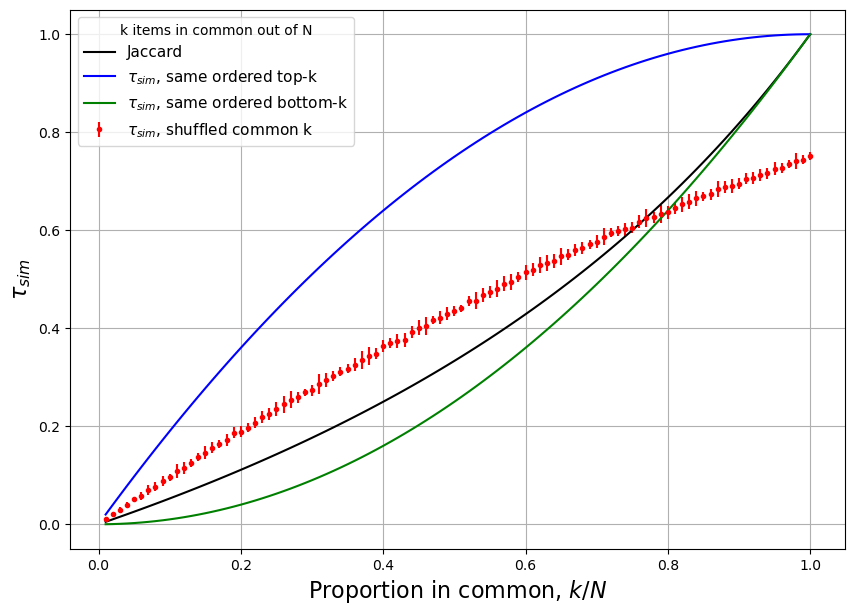

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.errorbar(p,mSh,yerr=sSh,fmt='.',ecolor='red',color='red',label=r'$\tau_{sim}$, shuffled common k')
plt.plot(p,jac,label='Jaccard',color='black')
plt.plot(p,mOrd,color='blue',label=r'$\tau_{sim}$, same ordered top-k')
plt.plot(p,mBot,color='green',label=r'$\tau_{sim}$, same ordered bottom-k')
plt.xlabel(r'Proportion in common, $k/N$', fontsize=16)
plt.ylabel(r'$\tau_{sim}$', fontsize=16)
plt.legend(fontsize=11, title = 'k items in common out of N')
plt.grid()
plt.show()
